<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/Copy_of_JPMC_E2E_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")

# df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/UCI_Credit_Card.csv")
# adult_census = pd.read_csv("https://github.com/fenago/MLEssentials2/blob/main/datasets/adult-census.csv?raw=true")

# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
df.to_csv("periodic_backup.csv")

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml
# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
df.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
277752  2015460256093                         2           9.0   
341446  201563CP07515                         2          90.0   
211325  2015360093835                         1           9.0   
342324  201563DP13615                         3           9.0   
153247  201520T029995                         1           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
277752                      0.0                3.0   
341446                      0.0                2.0   
211325                      0.0               18.0   
342324                      0.0               18.0   
153247                      0.0               18.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
277752                               0.0                1.0   
341446                               0.0                0.0   
211325                               0.0                0.0   
342324                               0.0                0.0   
153247                               0.0                4.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
277752                       0.0                        0.0   
341446                       0.0                        0.0   
211325                       1.0                        0.0   
342324                       0.0                        0.0   
153247                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Age_Band_of_Casualty  \
277752                          0.0  ...                   6.0   
341446                          0.0  ...                   9.0   
211325                          0.0  ...                   9.0   
342324                          0.0  ...                   6.0   
153247                          0.0  ...                   7.0   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
277752                  3                  0.0                  0.0   
341446                  3                 10.0                  8.0   
211325                  3                  0.0                  0.0   
342324                  2                  0.0                  0.0   
153247                  3                  0.0                  0.0   

       Car_Passenger Bus_or_Coach_Passenger  \
277752           1.0                    0.0   
341446           0.0                    0.0   
211325           0.0                    0.0   
342324           0.0                    0.0   
153247           0.0                    0.0   

       Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
277752                                0.0              9   
341446                                0.0              0   
211325                                0.0             19   
342324                                0.0             19   
153247                                0.0              9   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
277752                      1.0                  3.0  
341446                      1.0                  NaN  
211325                      3.0                 10.0  
342324                      1.0                  1.0  
153247                      NaN                  NaN  

[5 rows x 67 columns]

In [ ]:
%time
# Set your environment in a notebook:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
# pd.set_option('max_columns',None)
pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs

 Numpy: 1.23.5

 sklearn: 1.2.2


In [ ]:
df.head()

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
0  201501BS70001                         1          19.0   
1  201501BS70002                         1           9.0   
2  201501BS70004                         1           9.0   
3  201501BS70005                         1           9.0   
4  201501BS70008                         1           1.0   

   Towing_and_Articulation  Vehicle_Manoeuvre  \
0                      0.0                9.0   
1                      0.0                9.0   
2                      0.0                9.0   
3                      0.0                9.0   
4                      0.0               18.0   

   Vehicle_Location-Restricted_Lane  Junction_Location  \
0                               0.0                8.0   
1                               0.0                8.0   
2                               0.0                2.0   
3                               0.0                2.0   
4                               0.0                8.0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                  1.0                           1.0   
1                  1.0                           1.0   
2                  1.0                           1.0   
3                  1.0                           1.0   
4                  0.0                           1.0   

   Journey_Purpose_of_Driver Sex_of_Driver Age_of_Driver Age_Band_of_Driver  \
0                        1.0           1.0          None               None   
1                        6.0           1.0           NaN                NaN   
2                        6.0           1.0          30.0                6.0   
3                        6.0           1.0           NaN                NaN   
4                        2.0           1.0          48.0                8.0   

   Engine_Capacity_(CC)  Propulsion_Code  Age_of_Vehicle  \
0                2143.0              2.0             4.0   
1                1600.0              1.0             3.0   
2                1686.0              2.0            10.0   
3                   NaN              NaN             NaN   
4                   NaN              NaN             NaN   

  Driver_Home_Area_Type  Location_Easting_OSGR  Location_Northing_OSGR  \
0                  None               525130.0                180050.0   
1                   NaN               526530.0                178560.0   
2                   1.0               524610.0                181080.0   
3                   NaN               524420.0                181080.0   
4                   1.0               524630.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.198465  51.505538           1.0                3.0                 1.0   
1  -0.178838  51.491836           1.0                3.0                 1.0   
2  -0.205590  51.514910           1.0                3.0                 1.0   
3  -0.208327  51.514952           1.0                3.0                 1.0   
4  -0.206022  51.496572           1.0                2.0                 2.0   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                   1.0  12/01/2015          2.0  18:45   
1                   1.0  12/01/2015          2.0  07:50   

# Structural Analysis

In [ ]:
# 2. structural analysis of the data
# a) basic data queries
%time
df.sample(5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
79486   201506G006683                         2          19.0   
23563   201501LX50965                         1           1.0   
107912  2015120186717                         1           9.0   
135060  2015160C03401                         1           9.0   
244576  201543P296025                        16           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
79486                       0.0               18.0   
23563                       0.0               18.0   
107912                      0.0               18.0   
135060                      0.0               18.0   
244576                      0.0               18.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
79486                                0.0                8.0   
23563                                0.0                2.0   
107912                               0.0                1.0   
135060                               0.0                0.0   
244576                               0.0                0.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
79486                        0.0                        0.0   
23563                        0.0                        0.0   
107912                       0.0                        0.0   
135060                       0.0                        0.0   
244576                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
79486                           0.0                         0.0   
23563                           0.0                         0.0   
107912                          0.0                         0.0   
135060                          0.0                         0.0   
244576                          0.0                         0.0   

        1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
79486                   1.0                           1.0   
23563                   1.0                           1.0   
107912                  1.0                           1.0   
135060                  1.0                           1.0   
244576                  2.0                           1.0   

        Journey_Purpose_of_Driver Sex_of_Driver Age_of_Driver  \
79486                         6.0           1.0          42.0   
23563                         6.0           1.0          29.0   
107912                        6.0           1.0          81.0   
135060                        2.0           1.0          25.0   
244576                        6.0           1.0          69.0   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
79486                 7.0                1896.0              2.0   
23563                 6.0                   NaN              NaN   
107912               11.0                1598.0              2.0   
135060                5.0                 698.0              1.0   
244576               10.0                3839.0              1.0   

        Age_of_Vehicle Driver_Home_Area_Type  Location_Easting_OSGR  \
79486              7.0                   1.0               394220.0   
23563              NaN                   1.0               530490.0   
107912             6.0                   3.0               430348.0   
135060            10.0                   3.0               500404.0   
244576            32.0                   1.0               455113.0   

        Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
79486                 398950.0  -2.088576  53.487231           6.0   
23563                 178030.0  -0.122026  51.486174           1.0   
107912                455480.0  -1.538585  53.994473          12.0   
135060                439323.0  -0.475575  53.840462          16.0   
244576                220016.0  -1.200828  51.875998          43.0   

        Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
79486                 3.0                 2.

In [ ]:
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Rows and Columns: 
 (363243, 67) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  int64  
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriage

In [ ]:
df.nunique()

Accident_Index                        140056
Vehicle_Reference_df_res                  37
Vehicle_Type                              20
Towing_and_Articulation                    6
Vehicle_Manoeuvre                         18
                                       ...  
Bus_or_Coach_Passenger                     5
Pedestrian_Road_Maintenance_Worker         3
Casualty_Type                             21
Casualty_Home_Area_Type                    3
Casualty_IMD_Decile                       10
Length: 67, dtype: int64

In [ ]:
# df['Sex_of_Driver'].unique()

array([1, 2, 3], dtype=int16)

In [ ]:
# IMPORTANT:  Change data types to the correct data types
# EXAMPLE of one but you may have to repeat this process
# Change data type of 'sex_of_Driver'
# df['measles_'] = df['measles_'].astype('int64')
# df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
# df["weightlbs"]=pd.to_numeric(df["weightlbs"], errors='coerce')
df['Sex_of_Driver'] = df['Sex_of_Driver'].astype('int16')

# Even though Sex_of_Driver is a numerical or boolean feature, it somehow was stored as a categorical one. This is sometimes due to some typo in data recording. So let's take care of that.

In [ ]:
df['Sex_of_Driver'].dtypes

dtype('int16')

In [ ]:
# Treat obviously incorrect values in your dataset

# If you have values in your columns that you want to replace - use this for loop
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced

# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
# If you want to remove a value from a column - use this:
# df = df[df.status != 'unk']   # This removes the value 'unk' from your data in the column.  Modify as needed

In [ ]:
# drop multiple columns by name
# df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    50
object     10
int64       6
int16       1
dtype: int64

In [ ]:
# How many unique values per feature
df.nunique().to_frame()

0
Accident_Index                               140056
Vehicle_Reference_df_res                         37
Vehicle_Type                                     20
Towing_and_Articulation                           6
Vehicle_Manoeuvre                                18
Vehicle_Location-Restricted_Lane                 10
Junction_Location                                 9
Skidding_and_Overturning                          6
Hit_Object_in_Carriageway                        12
Vehicle_Leaving_Carriageway                       9
Hit_Object_off_Carriageway                       12
1st_Point_of_Impact                               5
Was_Vehicle_Left_Hand_Drive?                      2
Journey_Purpose_of_Driver                         6
Sex_of_Driver                                     3
Age_of_Driver                                    95
Age_Band_of_Driver                               11
Engine_Capacity_(CC)                           1140
Propulsion_Code                                  11
Age_of_Vehicle                                   72
Driver_Home_Area_Type                             3
Location_Easting_OSGR                         78609
Location_Northing_OSGR                        82205
Longitude                                    117588
Latitude                                     116292
Police_Force                                     49
Accident_Severity                                 3
Number_of_Vehicles                               15
Number_of_Casualties                             21
Date                                            365
Day_of_Week                                       7
Time                                           1439
Local_Authority_(District)                      356
Local_Authority_(Highway)                       204
1st_Road_Class                                    6
1st_Road_Number                                3938
Road_Type                                         6
Speed_limit                                       8
Junction_Detail                                   9
Junction_Control                                  4
2nd_Road_Class                                    6
2nd_Road_Number                                3707
Pedestrian_Crossing-Human_Control                 3
Pedestrian_Crossing-Physical_Facilities           6
Light_Conditions                                  5
Weather_Conditions                                9
Road_Surface_Conditions                           5
Special_Conditions_at_Site                        8
Carriageway_Hazards                               6
Urban_or_Rural_Area                               2
Did_Police_Officer_Attend_Scene_of_Accident       3
LSOA_of_Accident_Location                     25979
Vehicle_Reference_df                             28
Casualty_Reference                               38
Casualty_Class                                    3
Sex_of_Casualty                                   2
Age_of_Casualty                                 101
Age_Band_of_Casualty                             11
Casualty_Severity                                 3
Pedestrian_Location                              11
Pedestrian_Movement                              10
Car_Passenger                                     3
Bus_or_Coach_Passenger                            5
Pedestrian_Road_Maintenance_Worker                3
Casualty_Type                                    21
Casualty_Home_Area_Type                           3
Casualty_IMD_Decile                              10

In [ ]:
df.dtypes.to_frame()

0
Accident_Index                                object
Vehicle_Reference_df_res                       int64
Vehicle_Type                                 float64
Towing_and_Articulation                      float64
Vehicle_Manoeuvre                            float64
Vehicle_Location-Restricted_Lane             float64
Junction_Location                            float64
Skidding_and_Overturning                     float64
Hit_Object_in_Carriageway                    float64
Vehicle_Leaving_Carriageway                  float64
Hit_Object_off_Carriageway                   float64
1st_Point_of_Impact                          float64
Was_Vehicle_Left_Hand_Drive?                 float64
Journey_Purpose_of_Driver                    float64
Sex_of_Driver                                  int16
Age_of_Driver                                 object
Age_Band_of_Driver                            object
Engine_Capacity_(CC)                         float64
Propulsion_Code                              float64
Age_of_Vehicle                               float64
Driver_Home_Area_Type                         object
Location_Easting_OSGR                        float64
Location_Northing_OSGR                       float64
Longitude                                    float64
Latitude                                     float64
Police_Force                                 float64
Accident_Severity                            float64
Number_of_Vehicles                           float64
Number_of_Casualties                         float64
Date                                          object
Day_of_Week                                  float64
Time                                          object
Local_Authority_(District)                   float64
Local_Authority_(Highway)                     object
1st_Road_Class                               float64
1st_Road_Number                              float64
Road_Type                                    float64
Speed_limit                                  float64
Junction_Detail                              float64
Junction_Control                             float64
2nd_Road_Class                               float64
2nd_Road_Number                              float64
Pedestrian_Crossing-Human_Control            float64
Pedestrian_Crossing-Physical_Facilities      float64
Light_Conditions                             float64
Weather_Conditions                           float64
Road_Surface_Conditions                      float64
Special_Conditions_at_Site                   float64
Carriageway_Hazards                          float64
Urban_or_Rural_Area                          float64
Did_Police_Officer_Attend_Scene_of_Accident  float64
LSOA_of_Accident_Location                     object
Vehicle_Reference_df                           int64
Casualty_Reference                             int64
Casualty_Class                                 int64
Sex_of_Casualty                              float64
Age_of_Casualty                              float64
Age_Band_of_Casualty                         float64
Casualty_Severity                              int64
Pedestrian_Location                          float64
Pedestrian_Movement                          float64
Car_Passenger                                float64
Bus_or_Coach_Passenger                       float64
Pedestrian_Road_Maintenance_Worker           float64
Casualty_Type                                  int64
Casualty_Home_Area_Type                       object
Casualty_IMD_Decile                           object

In [ ]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
# add a todo... do the same for data datatypes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

Accident_Index Age_of_Driver Age_Band_of_Driver Driver_Home_Area_Type  \
0  201501BS70001          None               None                  None   
1  201501BS70002           NaN                NaN                   NaN   
2  201501BS70004          30.0                6.0                   1.0   
3  201501BS70005           NaN                NaN                   NaN   
4  201501BS70008          48.0                8.0                   1.0   

         Date   Time Local_Authority_(Highway) LSOA_of_Accident_Location  \
0  12/01/2015  18:45                 E09000020                 E01002825   
1  12/01/2015  07:50                 E09000020                 E01002820   
2  12/01/2015  18:08                 E09000020                 E01002833   
3  13/01/2015  07:40                 E09000020                 E01002874   
4  09/01/2015  07:30                 E09000020                 E01002814   

  Casualty_Home_Area_Type Casualty_IMD_Decile  
0                    None                None  
1                     1.0                 3.0  
2                     1.0                 6.0  
3                     1.0                 2.0  
4                     1.0                 3.0

Vehicle_Reference_df_res  Vehicle_Type  Towing_and_Articulation  \
0                         1          19.0                      0.0   
1                         1           9.0                      0.0   
2                         1           9.0                      0.0   
3                         1           9.0                      0.0   
4                         1           1.0                      0.0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                9.0                               0.0                8.0   
1                9.0                               0.0                8.0   
2                9.0                               0.0                2.0   
3                9.0                               0.0                2.0   
4               18.0                               0.0                8.0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                  1.0                           1.0   
1                  1.0                           1.0   
2                  1.0                           1.0   
3                  1.0                           1.0   
4                  0.0                           1.0   

   Journey_Purpose_of_Driver  Sex_of_Driver  Engine_Capacity_(CC)  \
0                        1.0              1                2143.0   
1                        6.0              1                1600.0   
2                        6.0              1                1686.0   
3                        6.0              1                   NaN   
4                        2.0              1                   NaN   

   Propulsion_Code  Age_of_Vehicle  Location_Easting_OSGR  \
0              2.0             4.0               525130.0   
1              1.0             3.0               526530.0   
2              2.0            10.0               524610.0   
3              NaN             NaN               524420.0   
4              NaN             NaN               524630.0   

   Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                180050.0  -0.198465  51.505538           1.0   
1                178560.0  -0.178838  51.491836           1.0   
2                181080.0  -0.205590  51.514910           1.0   
3                181080.0  -0.208327  51.514952           1.0   
4                179040.0  -0.206022  51.496572           1.0   

   Accident_Severity  Number_of_Vehicles  Number_of_Casualties  Day_of_Week  \
0                3.0                 1.0                   1.0          2.0   
1                3.0                 1.0                   1.0          2.0   
2                3.0                 1.0                   1.0          2.0   
3                3.0                 1.0                   1.0          3.0   
4                2.0                 2.0                   1.0          6.0   

   Local_Authority_(District)  1st_Road_Class  1st_Road_Number  Road_Type  \
0                        12.0             5.0              0.0        6.0   
1                        12.0             6.0              0.0        6.0   
2                        12.0             4.0            415.0        6.0   
3                        12.0             4.0            450.0        6.0   
4                        12

In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(363243, 67)


In [ ]:
# Display non-numerical features --> cat
df.select_dtypes(exclude="number").head()

Accident_Index Age_of_Driver Age_Band_of_Driver Driver_Home_Area_Type  \
0  201501BS70001          None               None                  None   
1  201501BS70002           NaN                NaN                   NaN   
2  201501BS70004          30.0                6.0                   1.0   
3  201501BS70005           NaN                NaN                   NaN   
4  201501BS70008          48.0                8.0                   1.0   

         Date   Time Local_Authority_(Highway) LSOA_of_Accident_Location  \
0  12/01/2015  18:45                 E09000020                 E01002825   
1  12/01/2015  07:50                 E09000020                 E01002820   
2  12/01/2015  18:08                 E09000020                 E01002833   
3  13/01/2015  07:40                 E09000020                 E01002874   
4  09/01/2015  07:30                 E09000020                 E01002814   

  Casualty_Home_Area_Type Casualty_IMD_Decile  
0                    None                None  
1                     1.0                 3.0  
2                     1.0                 6.0  
3                     1.0                 2.0  
4                     1.0                 3.0

In [ ]:
# Display numerical features --> numeric features
df.select_dtypes(include="number").head()

Vehicle_Reference_df_res  Vehicle_Type  Towing_and_Articulation  \
0                         1          19.0                      0.0   
1                         1           9.0                      0.0   
2                         1           9.0                      0.0   
3                         1           9.0                      0.0   
4                         1           1.0                      0.0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                9.0                               0.0                8.0   
1                9.0                               0.0                8.0   
2                9.0                               0.0                2.0   
3                9.0                               0.0                2.0   
4               18.0                               0.0                8.0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                  1.0                           1.0   
1                  1.0                           1.0   
2                  1.0                           1.0   
3                  1.0                           1.0   
4                  0.0                           1.0   

   Journey_Purpose_of_Driver  Sex_of_Driver  Engine_Capacity_(CC)  \
0                        1.0              1                2143.0   
1                        6.0              1                1600.0   
2                        6.0              1                1686.0   
3                        6.0              1                   NaN   
4                        2.0              1                   NaN   

   Propulsion_Code  Age_of_Vehicle  Location_Easting_OSGR  \
0              2.0             4.0               525130.0   
1              1.0             3.0               526530.0   
2              2.0            10.0               524610.0   
3              NaN             NaN               524420.0   
4              NaN             NaN               524630.0   

   Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                180050.0  -0.198465  51.505538           1.0   
1                178560.0  -0.178838  51.491836           1.0   
2                181080.0  -0.205590  51.514910           1.0   
3                181080.0  -0.208327  51.514952           1.0   
4                179040.0  -0.206022  51.496572           1.0   

   Accident_Severity  Number_of_Vehicles  Number_of_Casualties  Day_of_Week  \
0                3.0                 1.0                   1.0          2.0   
1                3.0                 1.0                   1.0          2.0   
2                3.0                 1.0                   1.0          2.0   
3                3.0                 1.0                   1.0          3.0   
4                2.0                 2.0                   1.0          6.0   

   Local_Authority_(District)  1st_Road_Class  1st_Road_Number  Road_Type  \
0                        12.0             5.0              0.0        6.0   
1                        12.0             6.0              0.0        6.0   
2                        12.0             4.0            415.0        6.0   
3                        12.0             4.0            450.0        6.0   
4                        12

# Quality Investigation

In [ ]:

# 3. Qualitative Investigation of the Data
# a) Duplicates
# Duplicates in the Columns?
# df.duplicated()
df.duplicated().sum()

# Duplicated Rows?
# df[df.duplicated()]
# Find duplicates in specific columns from your dataset.  Replace with your columns obviously.  keep the first or last dupe.
# df.loc[df.duplicated(keep='last'), ['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID']]

# Only consider duplicates in these columns and drop only them
# df.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate','CustomerID'], keep='first').sum()
# By looking only at these four columns instead of all of them, we can see that the number of duplicate rows may increase/decrease
# This means that there are rows that have the exact same values as these four columns but have different values in
# other columns, which means they may be different records.
# In most cases, it is better to use all the columns to identify duplicate records.

# df_unique = df.drop_duplicates(keep='first')
# df.drop_duplicates(keep='first')

# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=['Accident_Index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

0

You seem to have 0 duplicates in your database.


(363221, 67)

Accident_Index                                      0
Vehicle_Reference_df_res                            0
Vehicle_Type                                       62
Towing_and_Articulation                           379
Vehicle_Manoeuvre                                 184
Vehicle_Location-Restricted_Lane                  176
Junction_Location                                  84
Skidding_and_Overturning                          176
Hit_Object_in_Carriageway                         163
Vehicle_Leaving_Carriageway                       159
Hit_Object_off_Carriageway                          1
1st_Point_of_Impact                               206
Was_Vehicle_Left_Hand_Drive?                     1483
Journey_Purpose_of_Driver                          22
Sex_of_Driver                                       0
Age_of_Driver                                   35866
Age_Band_of_Driver                              35866
Engine_Capacity_(CC)                            93329
Propulsion_Code             

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

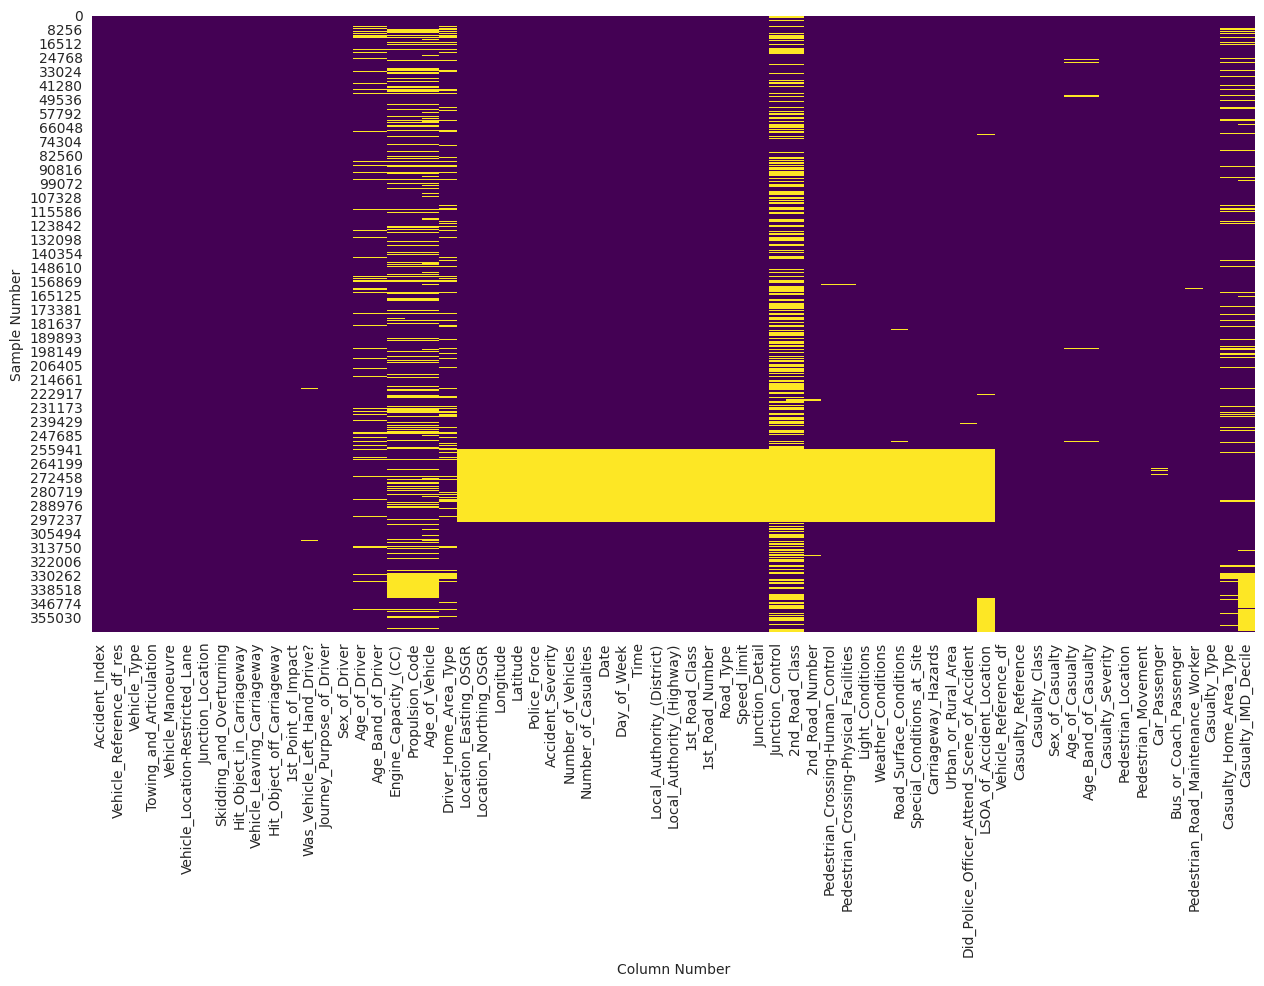

In [ ]:
# MISSING VALUES
# df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

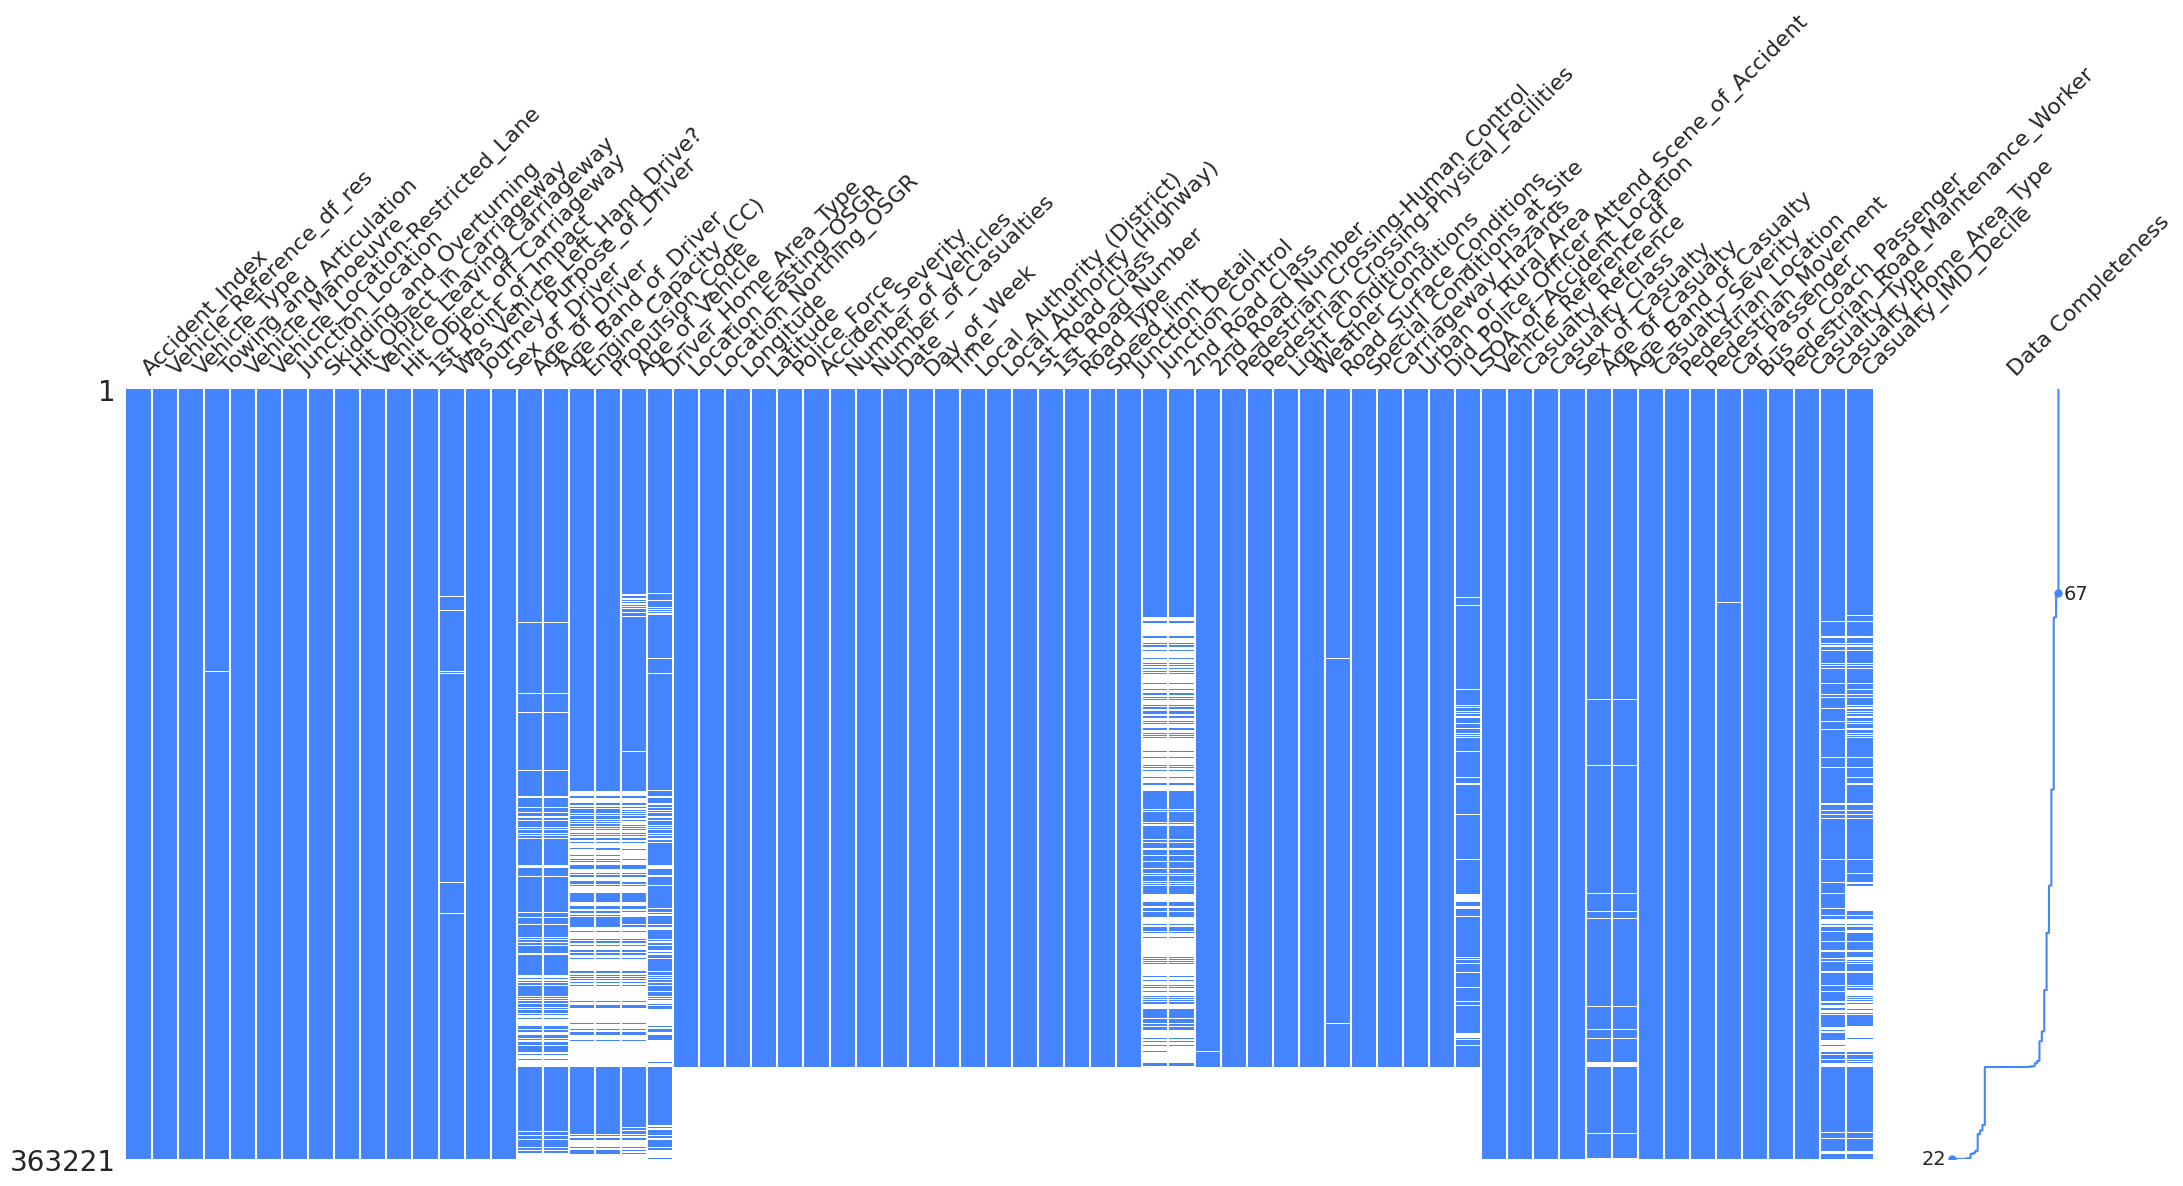

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Make a decision... drop rows that are 20% or more empty (you set the threshhold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis = 0).reset_index(drop=True)
df.shape

(319790, 67)

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

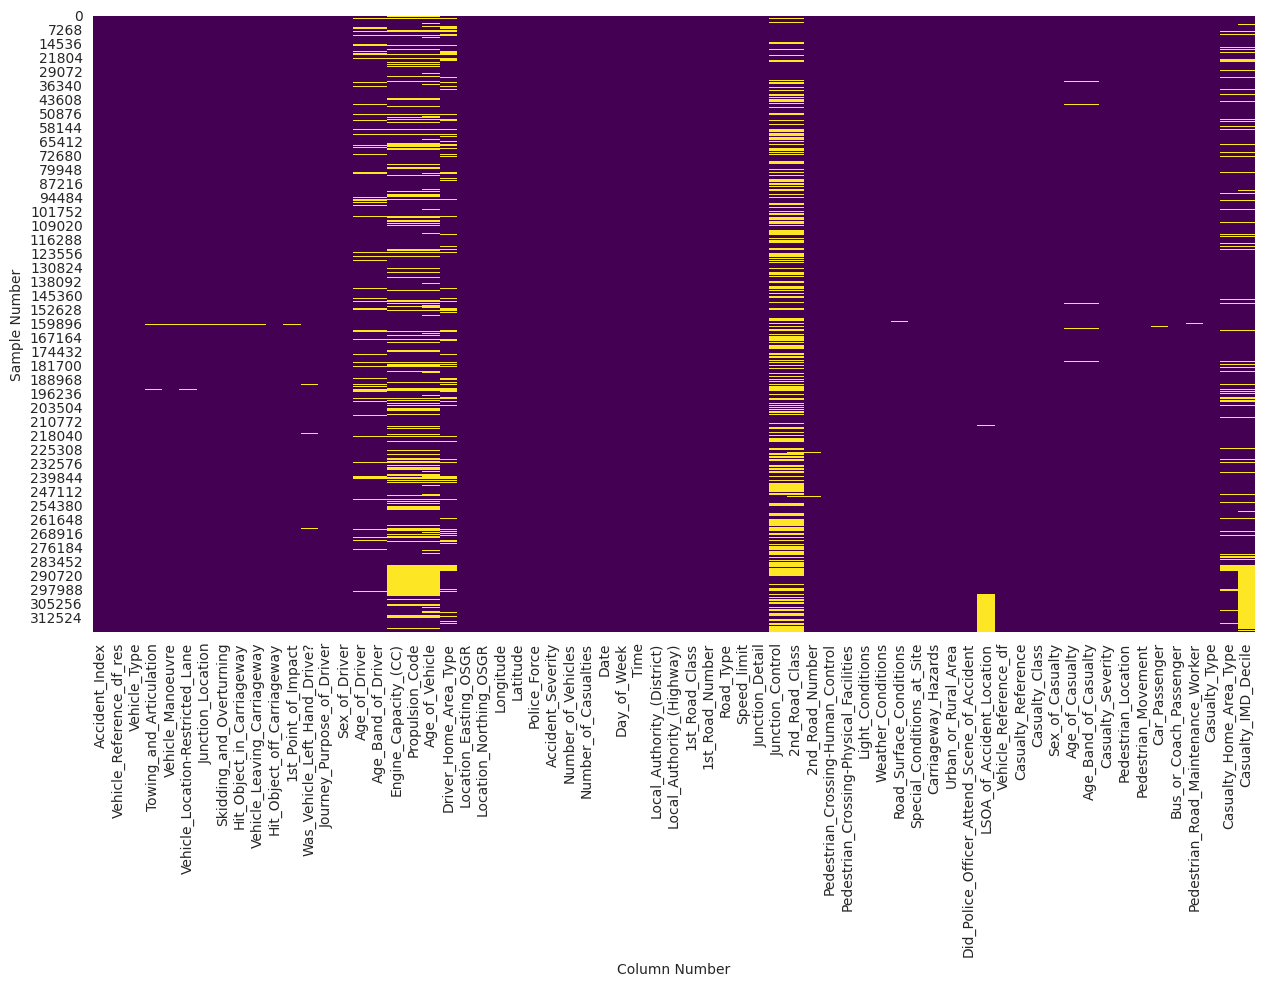

In [ ]:
# b) Missing Values per Sample (Big Holes)
# ROWS ONLY

plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

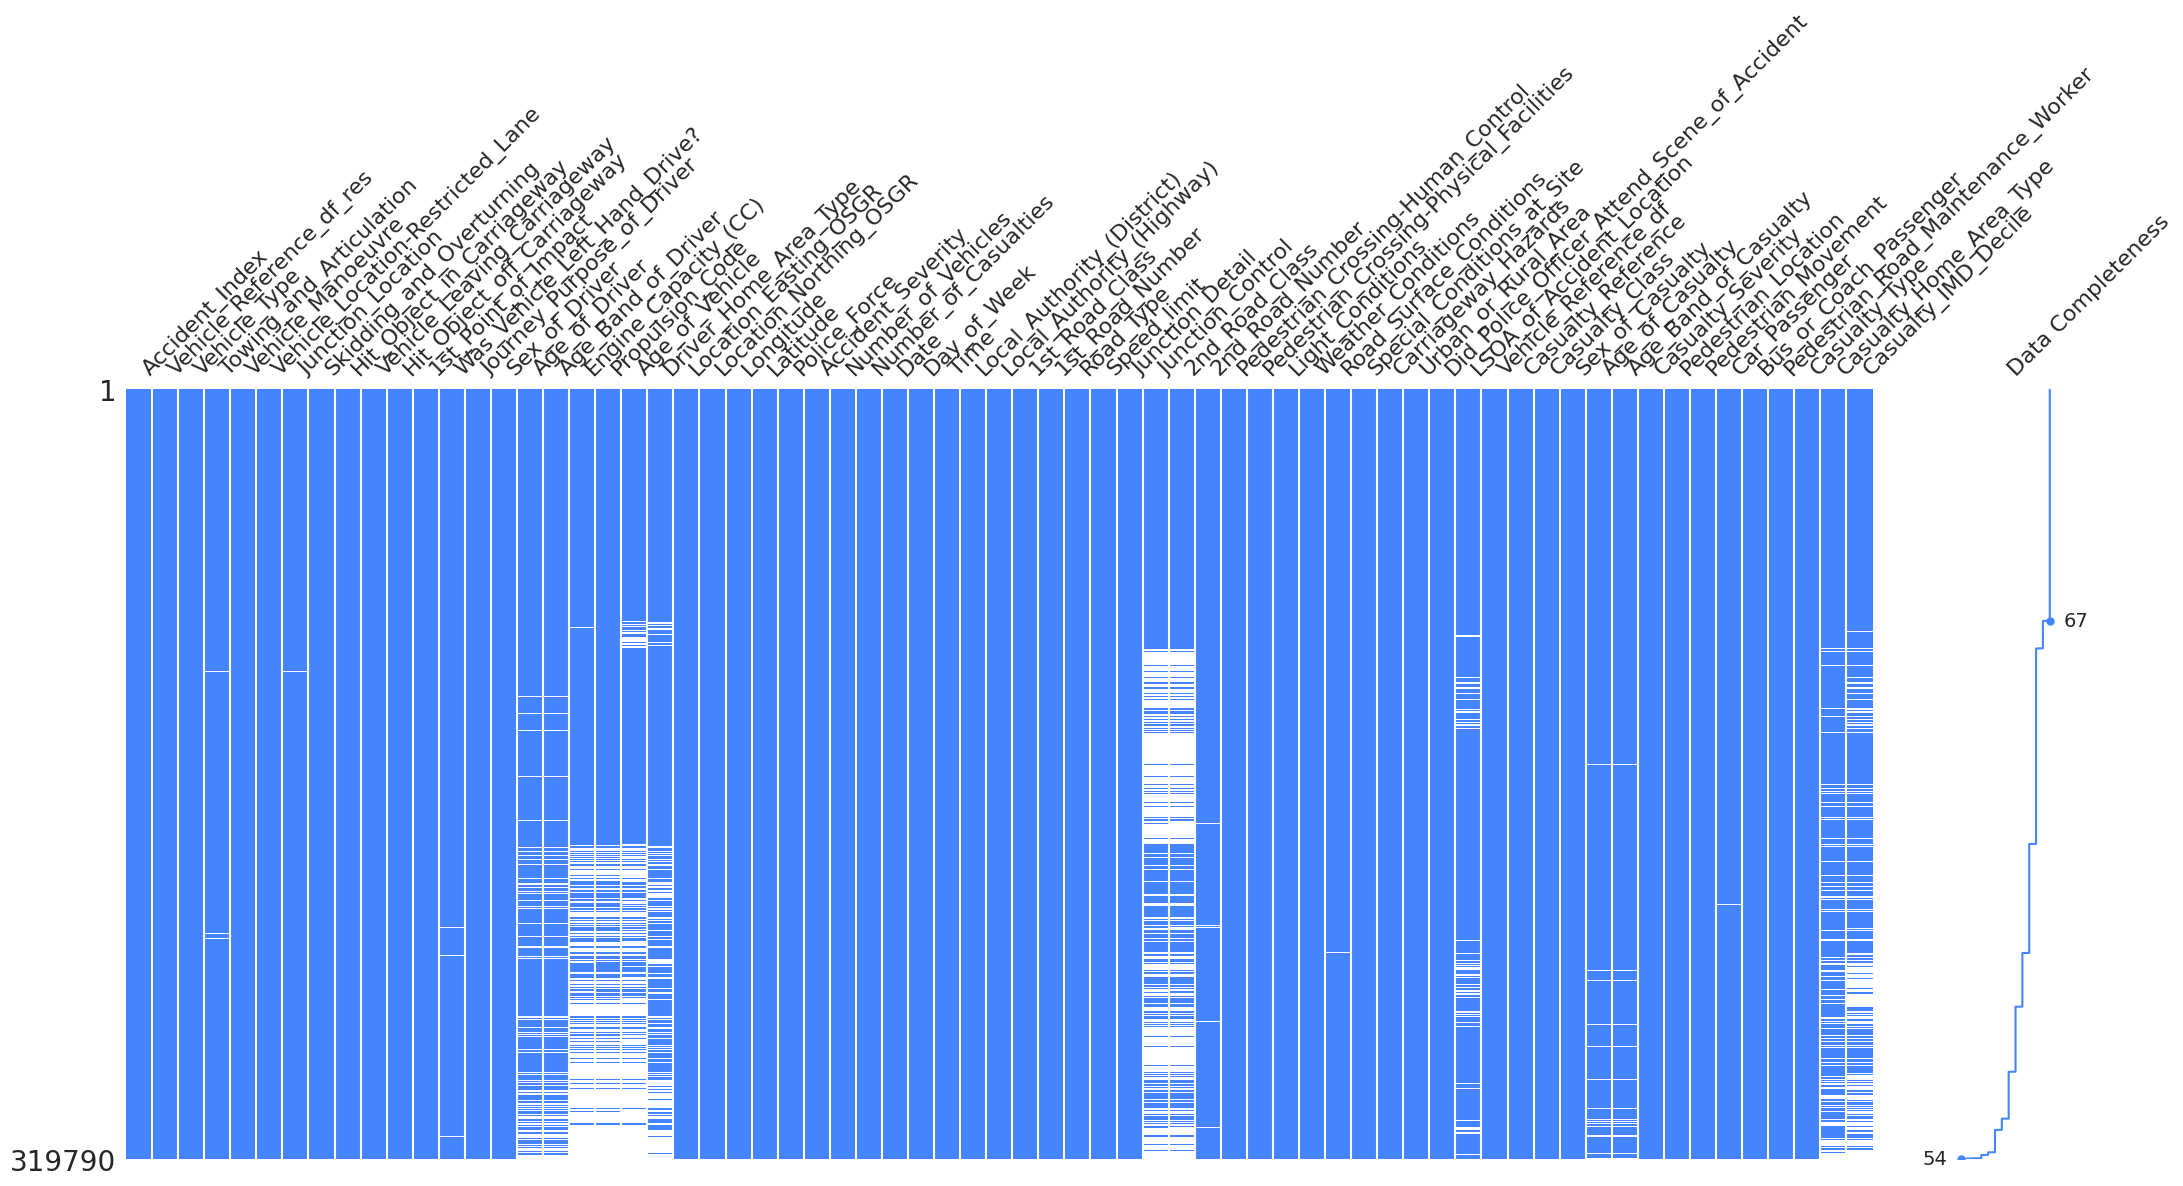

In [ ]:
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

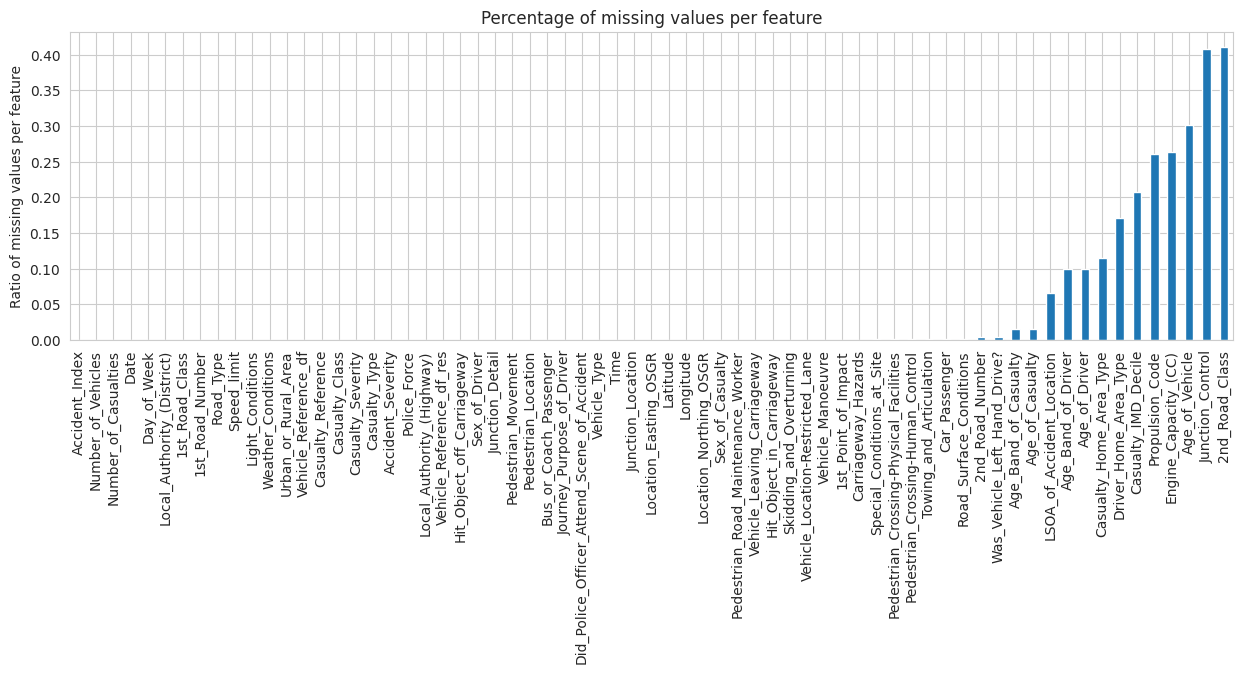

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# drop any col that is more than 15% empty
df = df.dropna(thresh=df.shape[0] * 0.85,axis=1)
df.shape

(319790, 60)

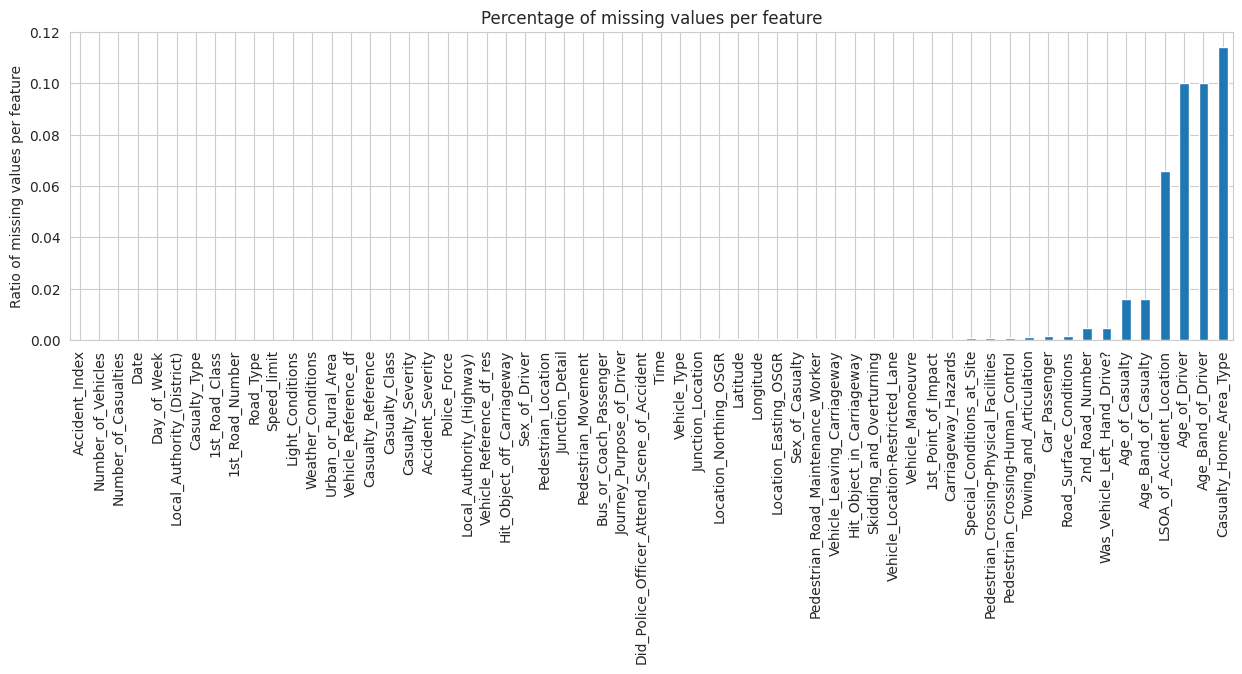

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

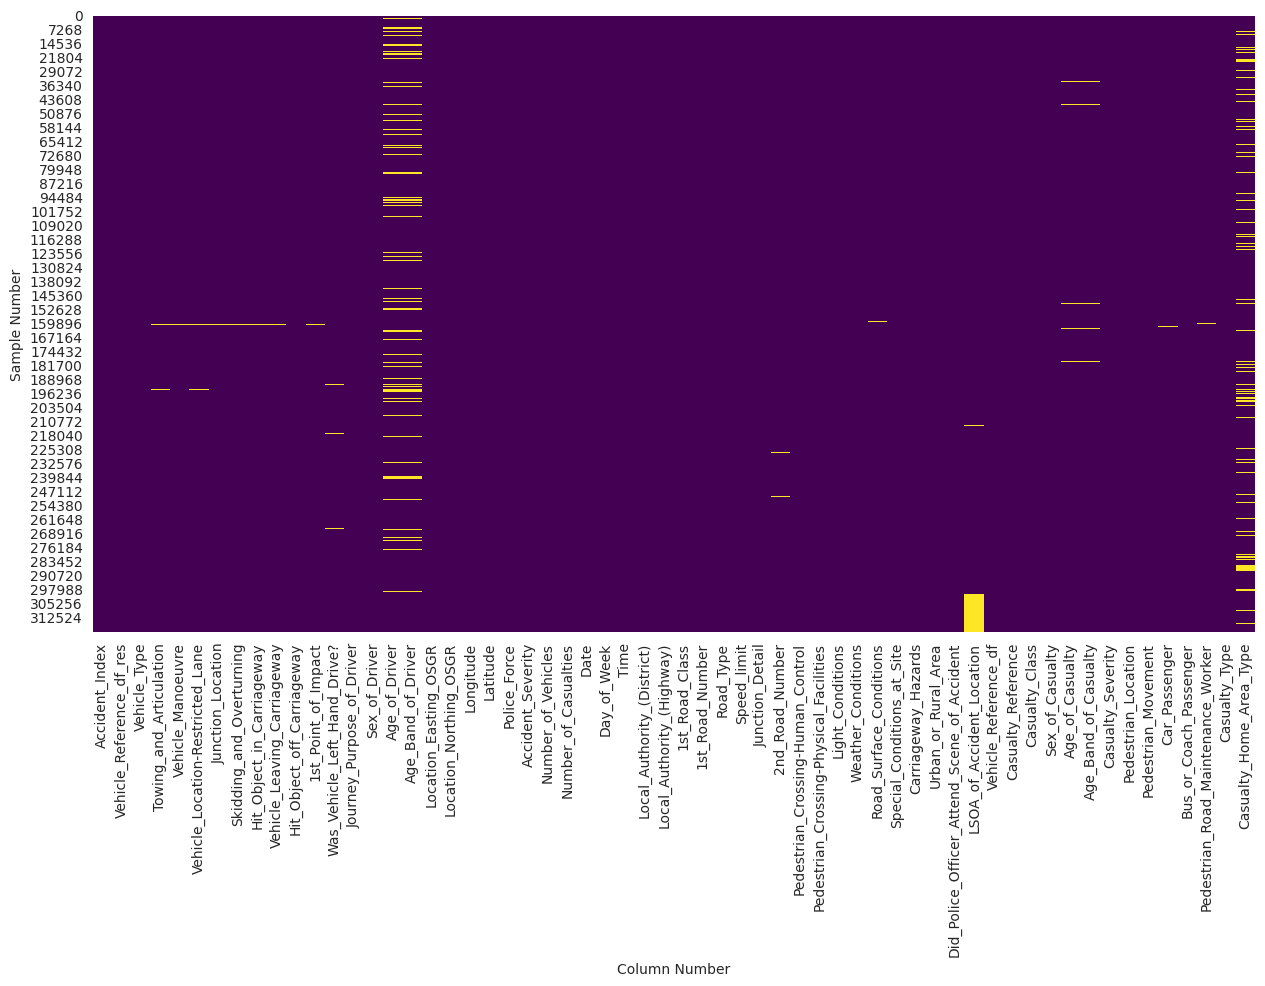

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
df.to_csv("df_clean_mv_dupes.csv")

In [ ]:
# d) Impute Values (Small Holes)
# df['CustomerID'].fillna('Missing', inplace=True)
# you can also use dropna()

# Replace NaN one column with the median
# df['col1'] = df['col1'].fillna(df['col1'].median())
# df = df.fillna(df.median())

# to see categorical encoding - see:  https://github.com/fenago/eda/blob/main/Cars_XGBoost.ipynb

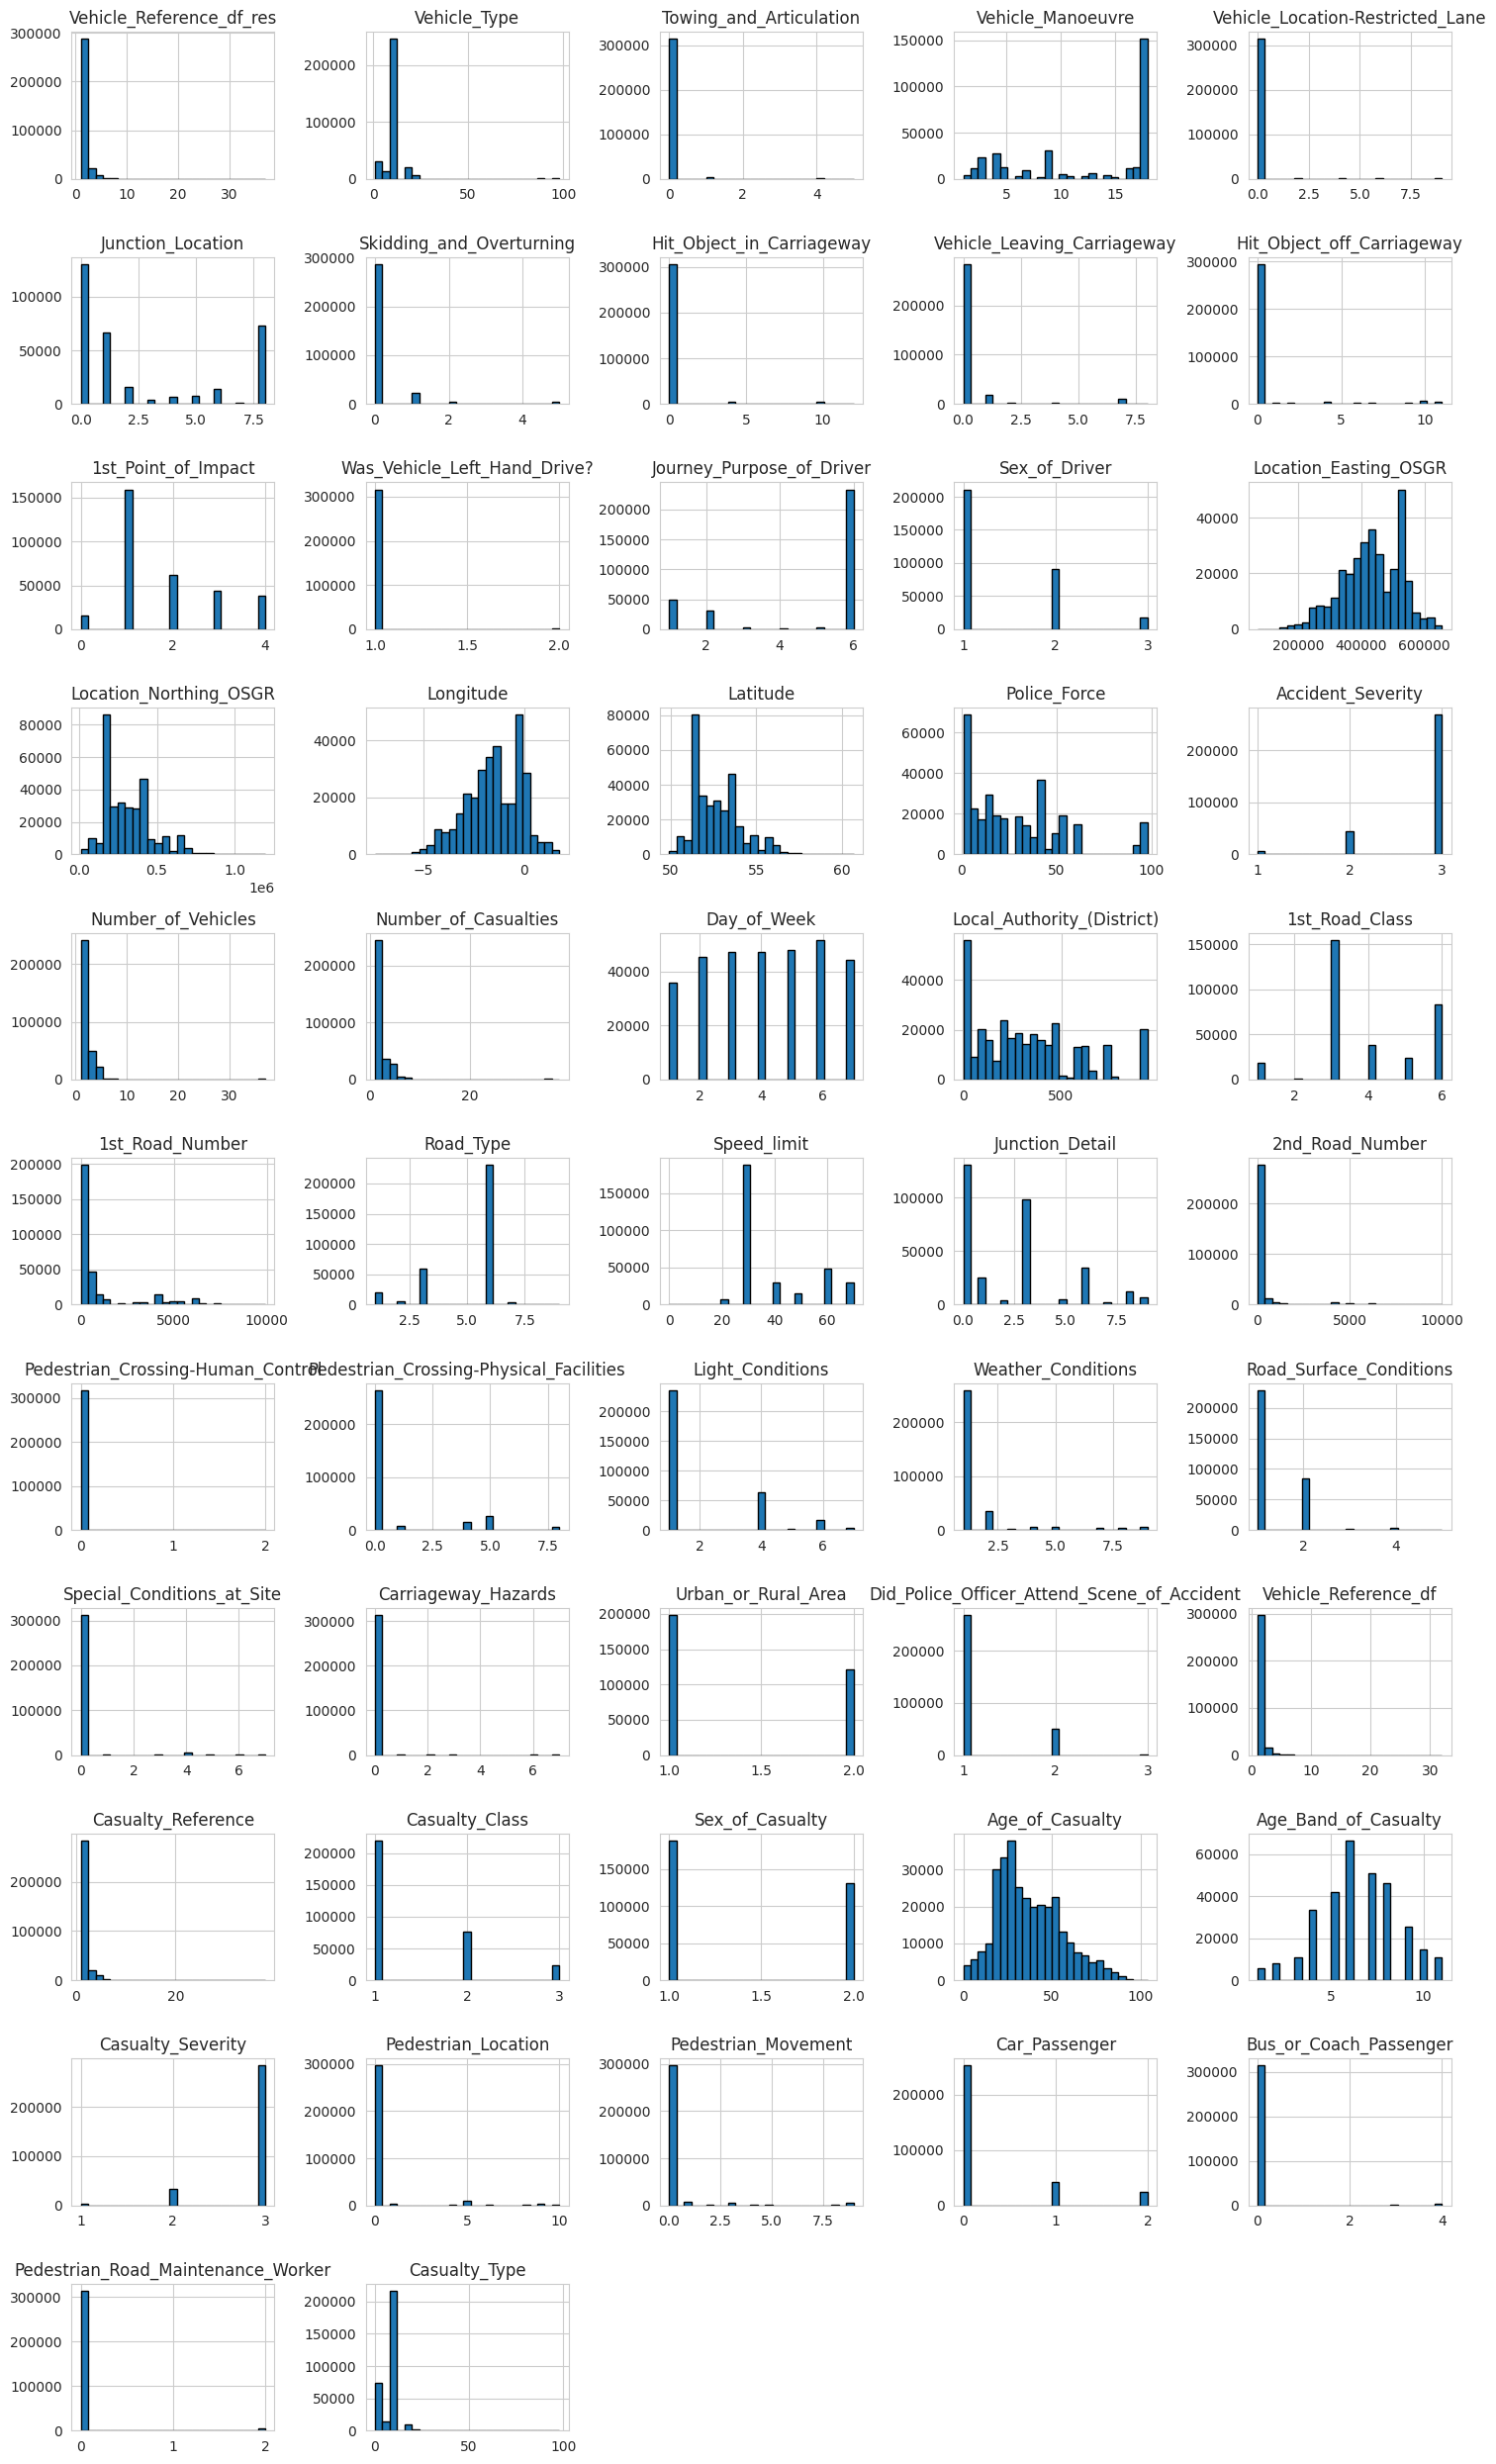

In [ ]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

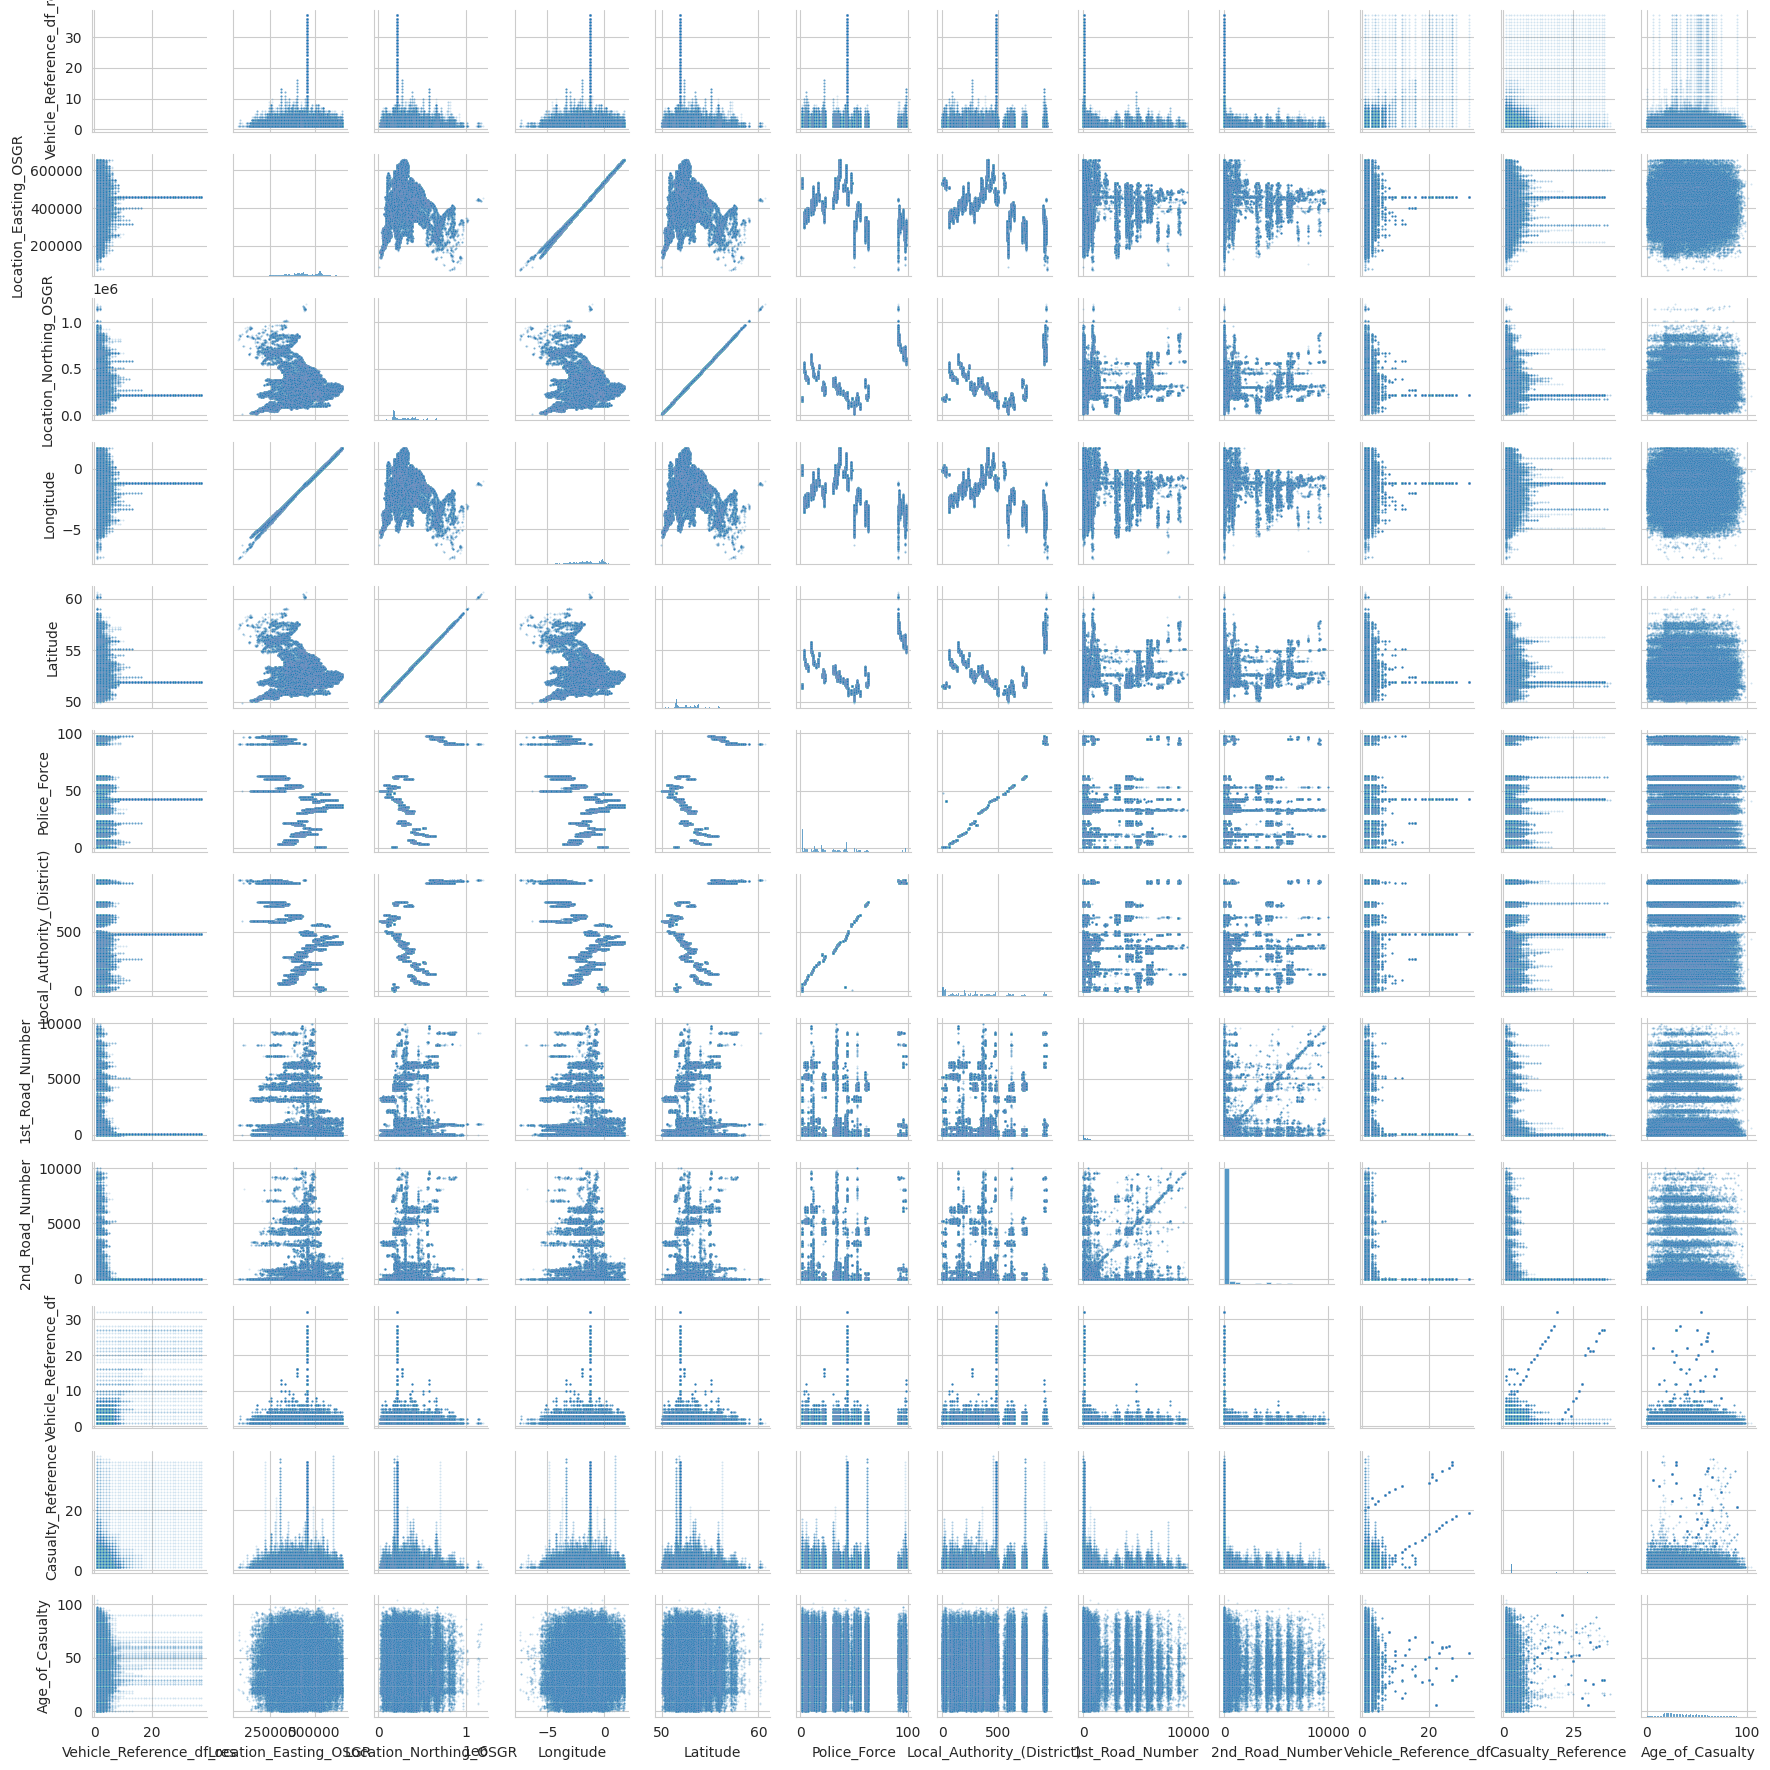

In [ ]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


In [ ]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(319790, 40)

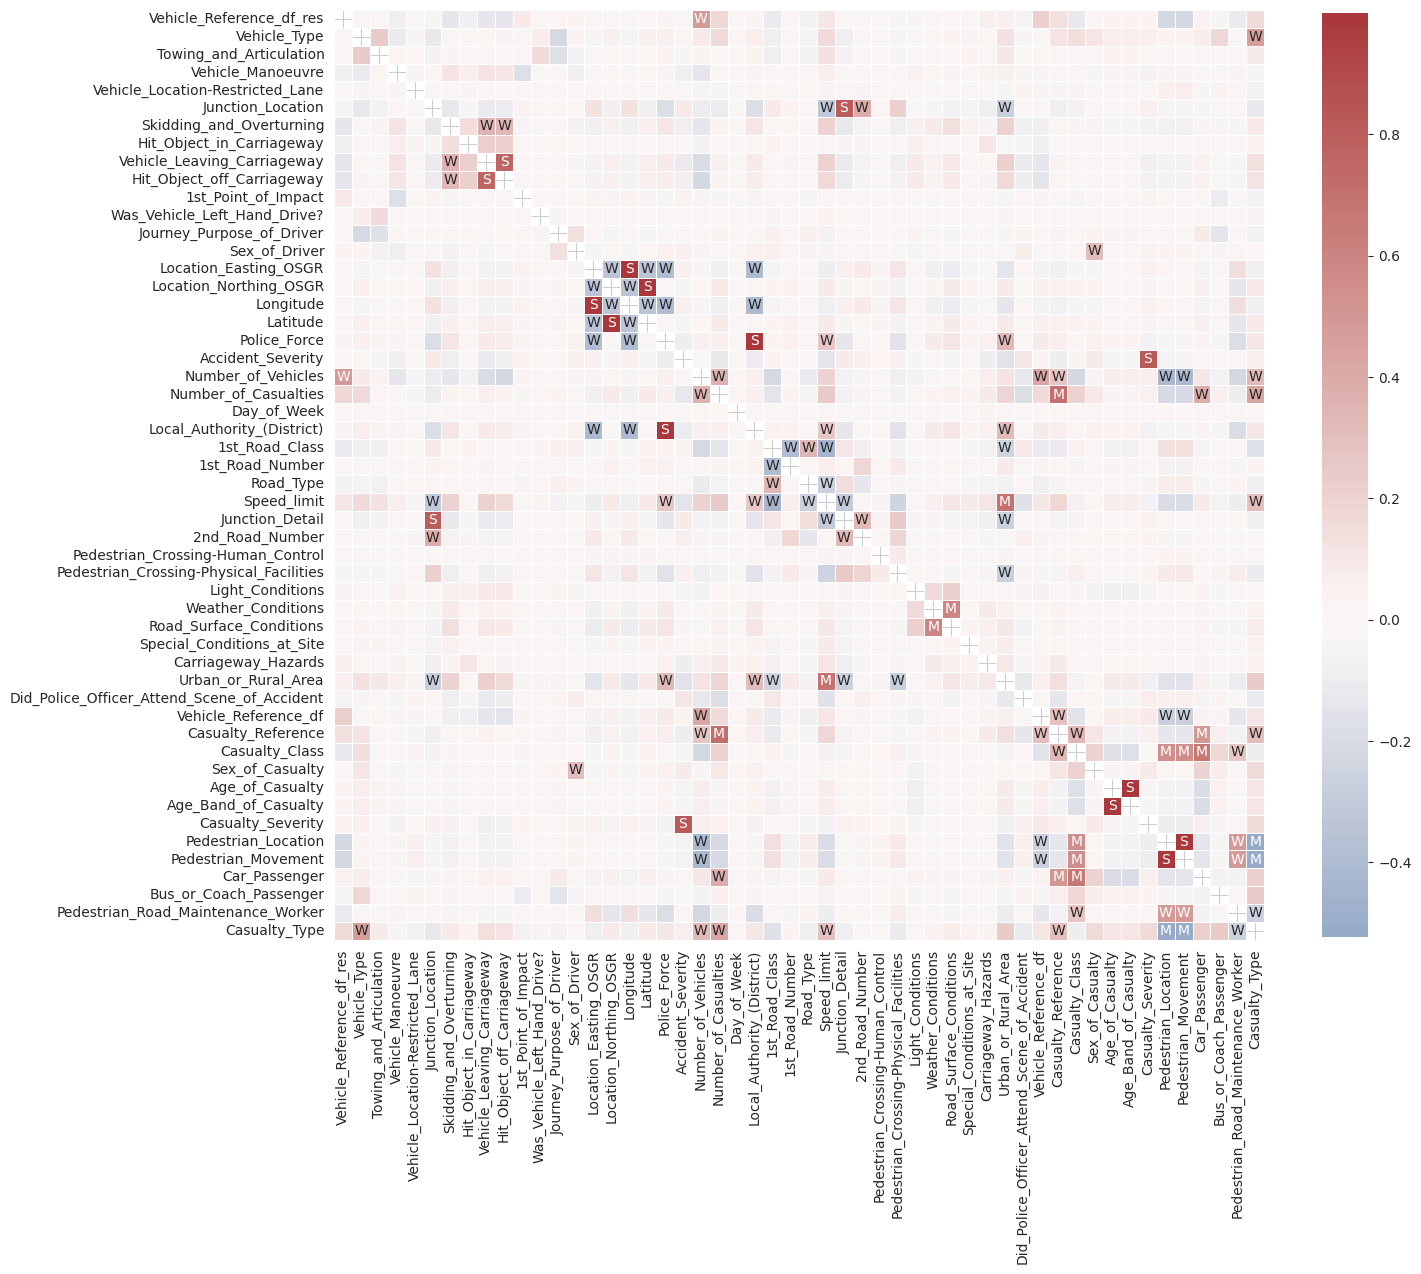

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Casualty_Type                                Pedestrian_Location                           -0.522722
                                             Pedestrian_Movement                           -0.522660
Speed_limit                                  1st_Road_Class                                -0.438545
Pedestrian_Movement                          Number_of_Vehicles                            -0.420804
Pedestrian_Location                          Number_of_Vehicles                            -0.420745
Local_Authority_(District)                   Location_Easting_OSGR                         -0.406636
                                             Longitude                                     -0.404787
Police_Force                                 Location_Easting_OSGR                         -0.400294
1st_Road_Number                              1st_Road_Class                                -0.399494
Police_Force                                 Longitude                                     